<a href="https://colab.research.google.com/github/Noa810/gal/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Wine Quality</h1>
<img src="https://storage.googleapis.com/kaggle-datasets-images/1866301/3047725/a8442c4170479f83d6dcab16b655bf87/dataset-cover.jpg?t=2022-01-15-19-25-24">

<div dir="rtl">
מגישה: נעה בן דוד<br>
בית ספר:מדעים<br>
תעודת זהות: 0218512291
<br>
מורה: מיכל מנדל
<br>
תאריך הגשה: יוני 2025

<div dir="rtl">
קישור לdataset מקאגל-
<br>



https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

<h1> מידע על מאגר הנתונים(מקאגל)- </h1>
<br>

מערך הנתונים הזה קשור לגרסאות אדומות של היין הפורטוגזי "Vinho Verde". מערך הנתונים מתאר את כמות הכימיקלים השונים הקיימים ביין ואת השפעתם על איכותו. ניתן לראות את מערכי הנתונים כמשימות סיווג או רגרסיה. השיעורים מסודרים ולא מאוזנים (למשל, יש הרבה יותר יינות רגילים מאשר מעולים או גרועים). המשימה שלך היא לחזות את איכות היין באמצעות הנתונים הנתונים.

פרויקט פשוט אך מאתגר, לצפות את איכות היין.
המורכבות נובעת מהעובדה שלמערך הנתונים יש פחות דוגמאות, והוא מאוד לא מאוזן.
האם אתה יכול להתגבר על המכשולים האלה ולבנות מודל חיזוי טוב כדי לסווג אותם?




<div dir="rtl">

# **-המחקר שלי**

מטרת המחקר שלי היא לגלות מה הופך יין ליין איכותי ומה המאפיינים המרכזים של יין שכזה

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install scikit-learn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report ,ConfusionMatrixDisplay

In [202]:
df = pd.read_csv('/content/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [203]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<div dir="rtl">

**העמודות:**

משתני קלט (מבוסס על מבחנים פיזיקוכימיים):\
1 - חומציות קבועה , משתנה ממשי ורציף\
2 - חומציות נדיפה,משתנה ממשי ורציף\
3 - חומצת לימון,משתנה ממשי ורציף\
4 - שאריות סוכר,משתנה ממשי ורציף\
5 - כלורידיםתמשתנה ממשי ורציף\
6 - דו תחמוצת גופרית חופשית,משתנה ממשי ורציף\
7 - סך דו תחמוצת הגופרית,משתנה ממשי ורציף\
8 - צפיפות,משתנה ממשי ורציף\
9 - pH,משתנה ממשי ורציף\
10 - סולפטים,משתנה ממשי ורציף\
11 - אלכוהול,משתנה שלם ורציף\
משתנה פלט (מבוסס על נתונים תחושתיים):\
12 - איכות (ציון בין 0 ל-10),משתנה שלם ורציף

In [205]:
# בדיקה האם יש ערכים חסרים בעזרת הפעולה dropna
# ניתן להבין שאין משתנים חסרים מכיוון שיש אותו מספר שורות גם לפני ביצוע הפעולה
df.dropna(axis=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [206]:
df.drop('Id', axis=1, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


<div dir="rtl">
הורדתי את העמודה Id מכיוון שהיא לא קשורה לנתונים ואין צורך להשאיר אותה במידע ולהכליל בגרפים

In [207]:
#בדיקת שמות העמודות
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [208]:
df.nunique()

,0
fixed acidity,91
volatile acidity,135
citric acid,77
residual sugar,80
chlorides,131
free sulfur dioxide,53
total sulfur dioxide,138
density,388
pH,87
sulphates,89


<div dir="rtl">
פעולה המחזירה את כמות המשתנים שמופיעים לפחות פעם אחת בכל עמודה , למשל בעמודה של הquality אפשר לדעת שנפגוש 6 אופציות לדירוג

In [209]:
df.select_dtypes(include="object").nunique()

,0


<div dir="rtl">
פעולה המחזירה את כל המשתנים המופיעים לפחות פעם אחת בכל עמודה מסוג object,
מכיוון שאין במאגר נתונים עמודה מסוג object בטבלא אין ערכים

In [210]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<div dir="rtl">

פעולה המציגה נתונים סטטיסטיים על משתנים מסוג מספרי מה שיכול לעזור בבניית גרף.


**count** מייצג כמה פעמים יש במאגר הנתונים שלנו שורה שבה הערך נמצא, אפשר לראות
שבכל המשתנים count = 1143, זה מכיוון שאין נתונים חסרים.

**mean** מייצג את הממוצע של הערכים בעמודה

**std** מייצג את סטיית התקן של הערכים בעמודה


**min** הערך הכי קטן שמופיע בעמודה

**25%** מייצגת את הערך אשר גדול מ25% משאר הערכים בעמודה

**50%** מייצגת את הערך אשר גדול מ50% משאר הערכים בעמודה, החציון

**75%** מייצגת את הערך אשר גדול מ75% משאר הערכים בעמודה

**max** מייצגת את הערך הכי גדול בעמודה

# **ויזואליזציה**

In [211]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<div dir="rtl">
הפקודה corr מראה את הקשר הלינארי בין 2 ערכים מספריים.
לדוגמא אם בין quality וalcohol יצא 0.48 אזאפשר לדעת שככל שאחד מהם עולה גם השני עולה בהתאמה של כמעט חצי מהעלייה.
ככל שהקשר קרוב יותר ל-1 או ל1 אפשר להבין שהמשתנים משפיעים אחד על השני

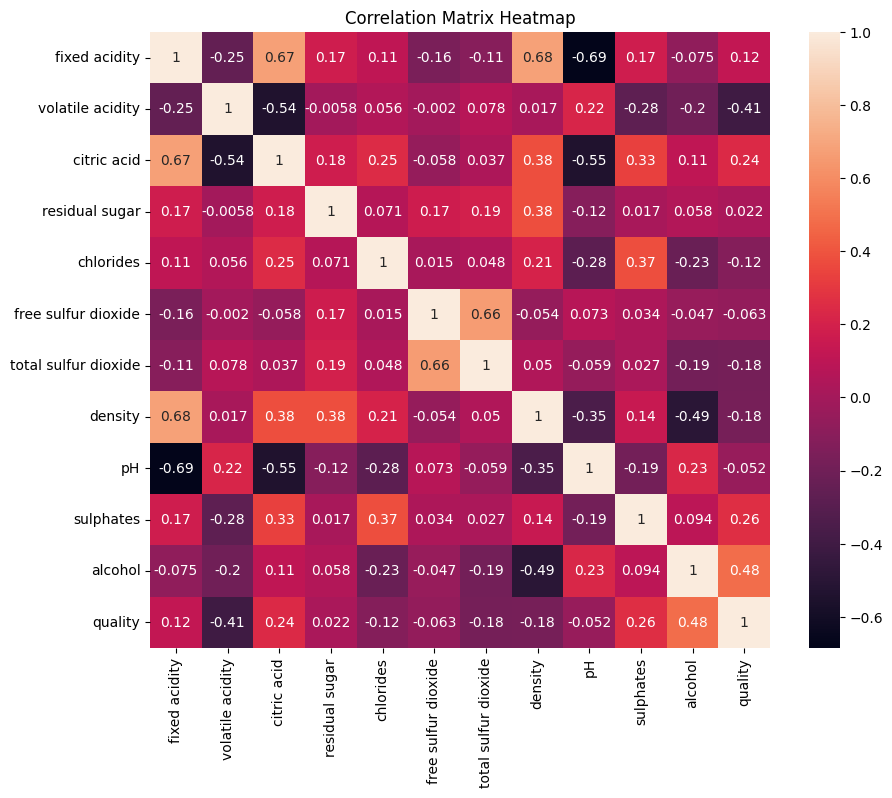

In [212]:
#1
# אני שומרת את הפקודה corr בתור משתנה בשביל ליצור heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.title('Correlation Matrix Heatmap')

ax = sns.heatmap(corr_matrix, annot=True)

<div dir="rtl">
הפעולה heatmap מראה את הפעולה corr בצורה חזותית

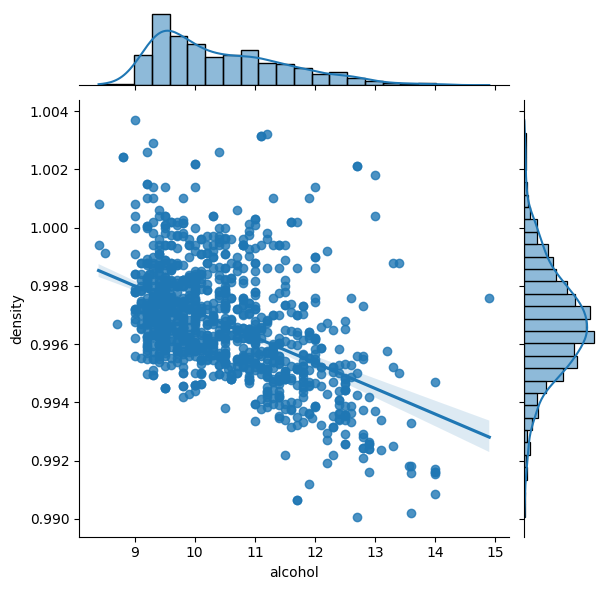

In [213]:
#2
sns.jointplot(x='alcohol', y='density', data=df, kind='reg')  # 'reg' adds a regression line
plt.show()

<div dir="rtl">

השתמשתי בגרף פיזור עם העברת קו מגמה ו2 גרפים מהצדדים המראים את צפיפת הנתונים בחלקים שונים של הגרף. הגרף מתבצע על המשתנים alcohol(רציף) ועל density (רציף)

<h1> מסקנות: </h1>

- ניתן לראות שיש אזור הדחוס בנתונים כאשר רוב הנקודות נמצאות באזורו

- קו המגמה עובר קרוב לרוב הנקודות

- קו המגמה יורד



**סיכום:**

אפשר להסיק שככל שכמות האלכוהול עולה כמות הדחיסות יורדת , בheatmap ניתן היה לראות שהקשר בין alcohol לבין density הוא -0.49 אז אפשר לדעת שהם משפיעים אחד על השני

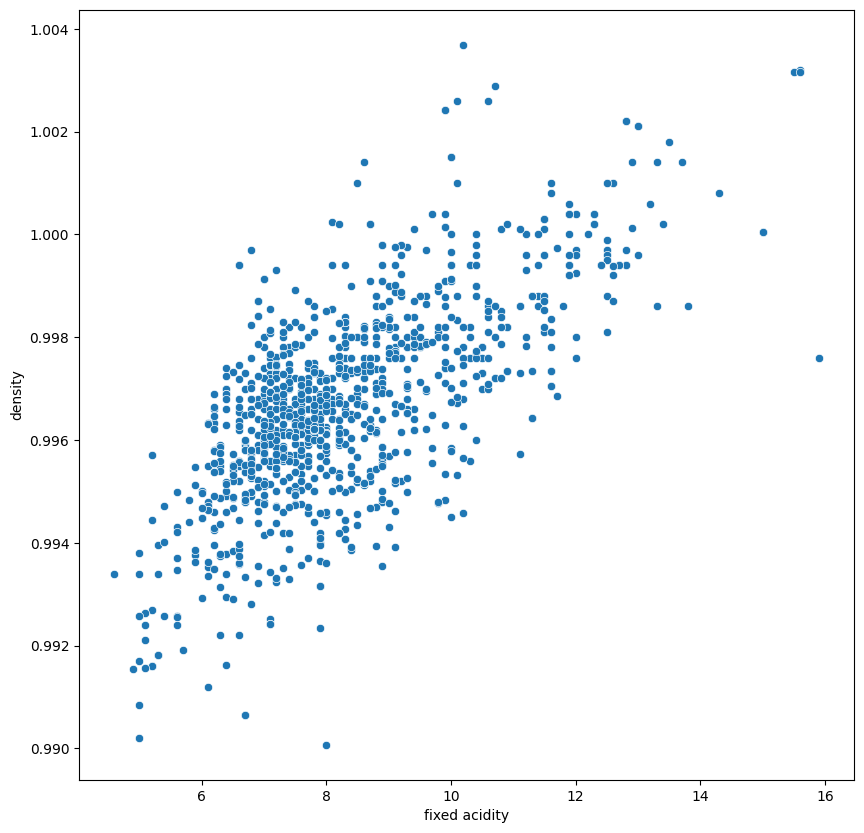

In [214]:
#3
plt.figure(figsize=(10,10))
sns.scatterplot(x = df['fixed acidity'] , y = df['density'])
plt.show()

<div dir="rtl">

השתמשתי בגרף פיזור על המשתנים fixed acidity (רציף) ועל density (רציף)

<h1> מסקנות: </h1>

- אפשר לראות שיש אזור שבאיזורו ממוקמות רוב הנקודות

- לא צריך קו מגמה כדי לראות שיש אכן קשר בין שני הערכים

- כמעט ואין ערכים היוצאים מן הכלל ולא קרובים לשאר הנקודות



**סיכום:**

בheatmap הקשר בין 2 המשתנים הוא 0.68, כמו שניתן לראות בגרף הזה באמת ככל שאחד המשתנים עולה כך גם משנהו

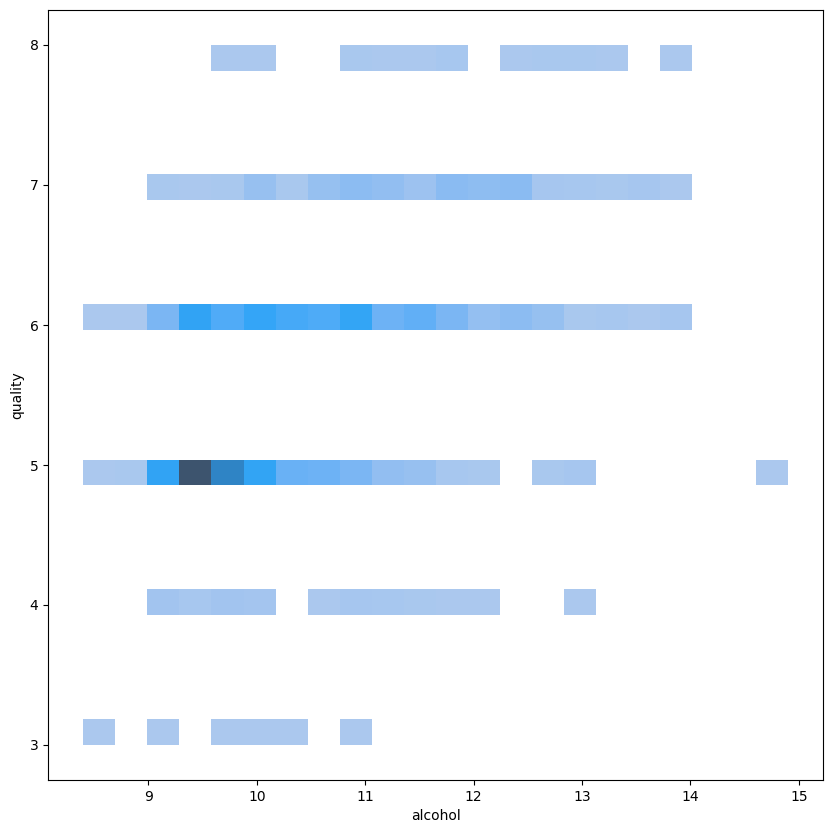

In [215]:
#4
plt.figure(figsize=(10,10))
sns.histplot(x = df['alcohol'] , y = df['quality'])
plt.show()

<div dir="rtl">

השתמשתי בגרף
על המשתנים alcohol(רציף) ועל quality (רציף)


<h1> מסקנות: </h1>


- דירוג רוב האלכוהול  נמצא בטווח 5-7 כאשר הריכוז הכי גבוהה בדירוג 5

- ככל שעולים בדירוג ניתן לראות שאורך טווח הארכים נוטה לזוז ימינה



**סיכום:**


בheatmap הקשר בין 2 הערכים הוא 0.48 , בגרף קשה יותר לראות את הקשר אך בהחלט ניתן לראות את השינוי שמתבצע ככל שעולים, כך הטווח זז ימינה מה שאומר שאחוז האלכוהול עולה וכך גם איכות היין.

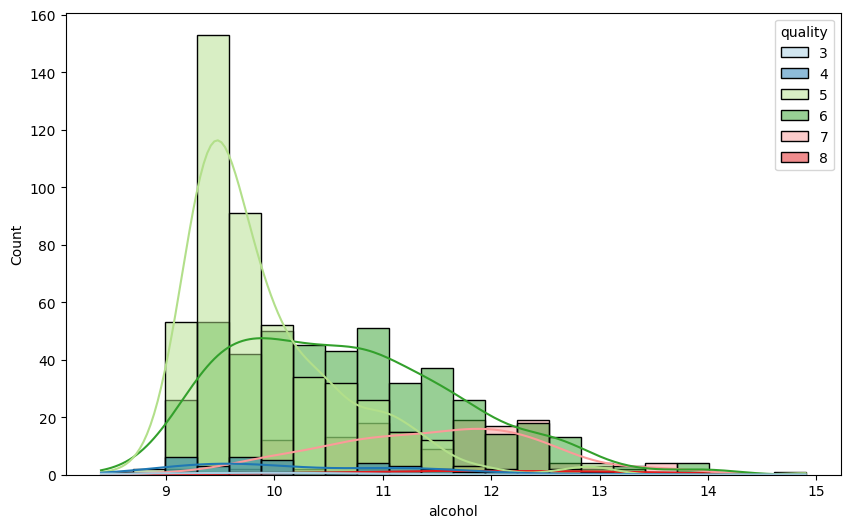

In [216]:
#5
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='alcohol',hue='quality',palette='Paired',kde=True)
plt.show()

<div dir="rtl">

השתמשתי בגרף עמודות עם קווי מגמה לכל ערך, למשל לערך quality=5 יש זינוק בין 9-10, הערך בצבע ירוק בהיר ואפשר לראות שגם קו המגמה שלו באותו הצבע ועולה כאשר הערך עולה.

הגרף מתבצע על הערכים alcohol(רציף) ועל quality (רציף)

<h1> מסקנות: </h1>

- אפשר לראות שרוב הנתונים הם על quality הנעה בין 5-7, כאשר 7-8 ו3-4 נמצאים בתחתית וכמעט לא מופיעים כי כמעט אין נקודות המכילות את הערכים הללו

- ישנו זינוק בין הערכים 9-10

- הערכים 7-8 מופיעים מימין יותר כאשר הנקודה הכי גבוהה של קו המגמה של quality=7 בנצא בין 12-13



**סיכום:**

הגרף מייצג בצורה שונה את מה שכבר הבנו בגרף לפניו

# **KNN**

In [217]:
# הכנה של הערכים ללימוד המכונה
x = df.drop(['residual sugar'],axis=1).to_numpy()
x.shape

(1143, 11)

<div dir="rtl">
הוצאה של העמודה residual sugar מכיוון שהיא הייתה בעלת הקשר הקרוב ביותר ל0 בheatmap בינה לבין quality (מכיוון שאני רוצה למדוד את האיכות)

In [218]:
# הכנה של ערך העמודה האופקית, אשר אני רוצה למדוד, שזהו איכות היין
y = df['quality'].to_numpy()
y.shape

(1143,)

In [219]:
#שליחת הנתונים לאימון ובדיקה
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,\
                                               shuffle=True,random_state=100)

print("train: ",X_train.shape,y_train.shape)

print("test: ",X_test.shape,y_test.shape)

train:  (914, 11) (914,)
test:  (229, 11) (229,)


In [220]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("min: {} max: {}".format(X_train.min(),X_train.max()))
print("min: {} max: {}".format(X_test.min(),X_test.max()))

#נרמול נתונים בשיטת minmax

min: 0.0 max: 1.0
min: 0.0 max: 1.160714285714286


In [221]:
# אפשרות שניה לנרמול בשיטה סטנדרטית
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [222]:

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('knn', KNeighborsRegressor())
        ])


param_grid = {
    'knn__n_neighbors' :[k for k in range(1,700,20)]
}

In [223]:

knn_clf = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1)
knn_clf.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 21, 41, 61, 81, 101, 121, 141,
                                              161, 181, 201, 221, 241, 261, 281,
                                              301, 321, 341, 361, 381, 401, 421,
                                              441, 461, 481, 501, 521, 541, 561,
                                              581, ...]},
             verbose=1)

In [224]:
#14
cv_results = pd.DataFrame(knn_clf.cv_results_)
print(cv_results[['param_knn__n_neighbors','mean_test_score','rank_test_score']].sort_values('rank_test_score'))


    param_knn__n_neighbors  mean_test_score  rank_test_score
0                        1         0.853993                1
1                       21         0.796335                2
2                       41         0.753887                3
3                       61         0.724890                4
4                       81         0.698850                5
5                      101         0.673015                6
6                      121         0.644633                7
7                      141         0.617994                8
8                      161         0.594410                9
9                      181         0.572735               10
10                     201         0.549737               11
11                     221         0.529822               12
12                     241         0.510927               13
13                     261         0.491731               14
14                     281         0.472530               15
15                     3

In [225]:
# מוצא את ערך החיזוי הכי קרוב למציאות ומדפיס אותו, ערך חיזוי של 1 אומר שזה חזה במדוייק
best_k = knn_clf.best_params_['knn__n_neighbors']
print("The best k is: ",best_k)

# מבטיח שהערך שמצאנו בשורת הקוד הקודמת יהיה במודל החדש הנשמר במשתנה
#Knn1
Knn1 = KNeighborsRegressor(n_neighbors=best_k)
Knn1.fit(X_train,y_train)

The best k is:  1


KNeighborsRegressor(n_neighbors=1)

In [226]:
# מקבל את הנתונים לבדיקה ומנסה לחזות אותם, אני שומרת את החיזוי בתור משתנה בשביל להציג לאחר מכן
y_pred = Knn1.predict(X_test)
y_pred.shape

(229,)

<div dir="rtl">



<h1> Confusion matrix & Classification report </h1>




              precision    recall  f1-score   support

           4       0.60      0.38      0.46         8
           5       0.93      0.98      0.95       102
           6       0.97      0.96      0.96        97
           7       0.95      0.86      0.90        22

    accuracy                           0.94       229
   macro avg       0.86      0.79      0.82       229
weighted avg       0.93      0.94      0.94       229



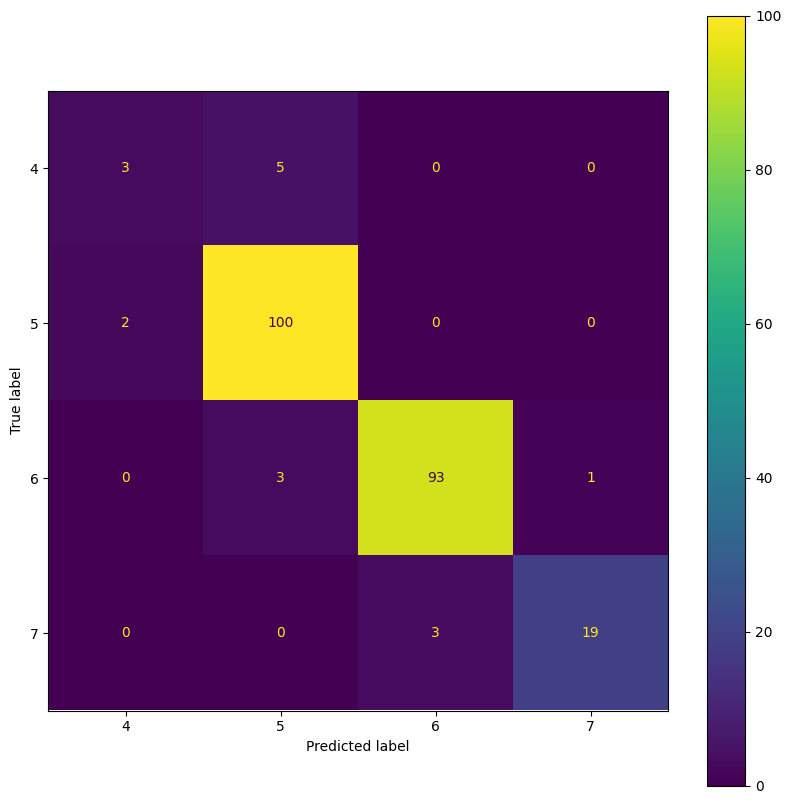

In [227]:
#הגדרה של גודל התצוגה
fig,ax = plt.subplots(figsize=(10,10))
# להראות את התצוגה של הערכים שחיזינו מול הערכים האמיתיים
confusion_matrix= ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=ax)
# מדפיס את הקשר הלינארי בין ערכים שונים
print(classification_report(y_true=y_test, y_pred=y_pred))

<div dir="rtl">

יצירת גרף של חיזוי מול תוצאה אמיתית, אפשר לראות שרוב הנתונים חוזו בצורה נכונה חוץ ממספר נתונים בודדים שחוזו נקודה למעלה או למטה , במבט מלמעלה זה אומר שהחיזוי הצליח


**Precision (דיוק)**

מה אחוז הדגימות שהמודל סיווג כמשתייכות למחלקה מסוימת, ואכן השתייכו למחלקה זו בפועל.


**Recall (רגישות / כיסוי)**

מה אחוז הדגימות שבאמת משתייכות למחלקה מסוימת, שהמודל סיווג נכון.


**F1-Score**


ממוצע הרמוני של Precision ו-Recall. הוא מספק איזון בין שני המדדים ולעיתים קרובות שימושי יותר מאשר Precision או Recall לבד, במיוחד כשיש אי-איזון במחלקות.

**Support (תמיכה)**

מספר הדגימות האמיתיות (ב-y_true) השייכות למחלקה זו בנתוני הבדיקה.

In [228]:
knn3 = KNeighborsRegressor(n_neighbors=1)
knn3.fit(x,y)

KNeighborsRegressor(n_neighbors=1)

<div dir="rtl">

 מודל רגרסיה משמש לחיזוי ערכים רציפים (בניגוד למודל סיווג שמחזה מחלקות). במקרה זה, המטרה היא לחזות את איכות היין, שהיא ערך מספרי רציף.

 n_neighbors מייצג את מספר השכנים הקרובים ביותר לנקודה שממנו יחזה את שיעור איכות היין

**ACCURACY SCORE & PREDICTION**

In [229]:
# דוגמא לחיזוי נתונים, אני מכניסה ערכים לכל עמודה ומקבלת את הדירוג שאמור לצאת לאיכות היין

knn3.predict([[7.9,0.52,0.25,2.2,0.079,13.0,37.0,0.9978,3.31,0.62,10.2]])

array([8.])

In [230]:
accuracy_score(y_true=y_test, y_pred = y_pred)

0.9388646288209607

<div dir="rtl">


אפשר לראות שמדד החיזוי עומד על 0.93 שזה מספר גבוהה מה שאומר שאין צורך לתקן את המודל והוא עובד

# **SVM**

In [231]:
x = df.drop(['total sulfur dioxide','density','fixed acidity'],axis=1).to_numpy()
y = df['quality']

In [232]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,\
                                      shuffle=True,random_state=41)
print("train: ", X_train.shape, y_train.shape)
print("test:  " , X_test.shape, y_test.shape)


train:  (914, 9) (914,)
test:   (229, 9) (229,)


In [233]:
from sklearn.svm import SVC

pipe = Pipeline([
        ('scale', StandardScaler()),
        ('svc', SVC())
        ])

In [234]:
param_grid = {
    'svc__kernel': ['linear','rbf','poly'],
    'svc__C' :[0.1,1,10,15]
}
param_grid

{'svc__kernel': ['linear', 'rbf', 'poly'], 'svc__C': [0.1, 1, 10, 15]}

In [235]:
svm_clf_1 = GridSearchCV(pipe, param_grid=param_grid, cv=4, verbose=1)
svm_clf_1.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 15],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [236]:
cv_results = pd.DataFrame(svm_clf_1.cv_results_)
cv_results[['param_svc__C','param_svc__kernel','mean_test_score','rank_test_score']].sort_values('rank_test_score')

,param_svc__C,param_svc__kernel,mean_test_score,rank_test_score
3,1.0,linear,0.995624,1
6,10.0,linear,0.995624,1
9,15.0,linear,0.995624,1
0,0.1,linear,0.993435,4
8,10.0,poly,0.993435,4
11,15.0,poly,0.992339,6
10,15.0,rbf,0.974824,7
7,10.0,rbf,0.974824,7
4,1.0,rbf,0.967163,9
5,1.0,poly,0.967163,9


In [237]:
svm_clf_1.best_params_

{'svc__C': 1, 'svc__kernel': 'linear'}

In [238]:
y_pred = svm_clf_1.predict(X_test)
y_pred.shape

(229,)

In [239]:
accuracy_score(y_true=y_test, y_pred = y_pred)

1.0

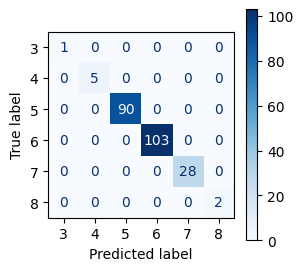

In [240]:
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred = y_pred,\
                                values_format="d",cmap="Blues",ax=ax);

In [241]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        90
           6       1.00      1.00      1.00       103
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00         2

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



#  סיכום ורפלקציה

<div dir="rtl">

במהלך העבודה נחפשתי לסביבת לימודים חדשה, אשר שונה מאוד מהתוכנות הרגילות שאני משתמשת בהן (בעיקר java וpython)
מה שנתן לי ידע נרחב יותר על עולם התכנות ומקומות בהם אני יכולה למצוא מידע ועזרה.
העבודה בסביבה שבה הקוד אינו רצוף הייתה אכן מאתגרת אך גם חדשה ומעניינת לחקירה.

בתקלתי גם במגוון פקודות שלא הכרתי במהלך הלמידה העצמית, חלקן מאוד מעניינות ,חלקן פשוטות וחלקן מורכבות. עברתי גם על מגוון של datasets במטרה למצוא אחד
עם נתונים מתאימים למחקר שלי, מה שגרם לי ללמוד לזהות מאפיינים שונים (לדוגמא
חיפשתי מאגר מידע שהנתונים שלו בheatmap אינם כולם קטנים מ0.1 על מנת שהחיזוי יהיה מדוייק).

במהלך העבודה החלפתי מספר פעמים את כל מאגרי הנתונים  עד שהגעתי למאגר שאני שלמה איתו ומרגישה שהצלחתי להעביר דרכו את הידע שלי בצורה הכי טובה ואיכותית שיש.

הבנתי גם שלמרות שיש פקודות שמגיעות לאותה מטרה יש כאלו אשר פועלות בצורה טובה יותר תלוי במאגר הנתונים שעליו מריצים את הפקודות.

לסיכום העבודה הייתה מאתגרת ומעניינת, הרגשתי שלמדתי דרכה הרבה דברים חדשים.
